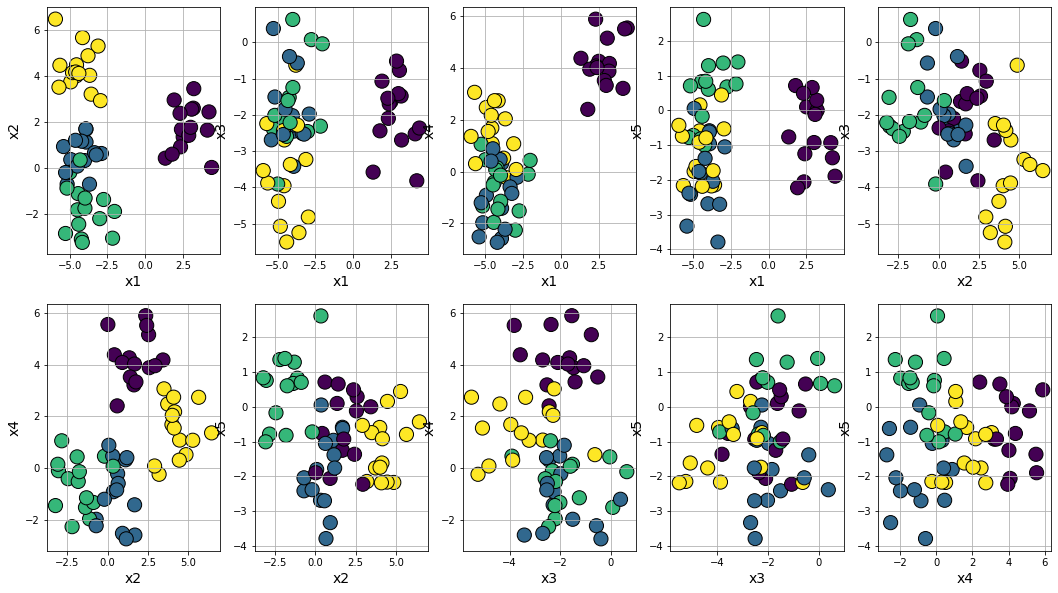

In [29]:
from sklearn.datasets import make_blobs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import adjusted_rand_score
from sklearn.cluster import AgglomerativeClustering
from rerf.urerf import UnsupervisedRandomForest
from sklearn.preprocessing import StandardScaler

data = make_blobs(n_samples=60, n_features=5, centers=4, cluster_std=1.0, 
                   center_box=(-5.0, 5.0), shuffle=True, random_state=None)
df = pd.DataFrame(data[0],columns=['x'+str(i) for i in range(1,6)])
df['y'] = data[1]
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

from itertools import combinations
from math import ceil
lst_var=list(combinations(df.columns[:-1],2))
len_var = len(lst_var)
plt.figure(figsize=(18,10))
for i in range(1,len_var+1):
    plt.subplot(2,ceil(len_var/2),i)
    var1 = lst_var[i-1][0]
    var2 = lst_var[i-1][1]
    plt.scatter(df[var1],df[var2],s=200,c=df['y'],edgecolor='k')
    plt.xlabel(var1,fontsize=14)
    plt.ylabel(var2,fontsize=14)
    plt.grid(True)

In [67]:
data[0]

array([[ 2.51180344e+00,  1.34817074e+00, -1.62801407e+00,
         4.26218517e+00,  9.84196759e-02],
       [ 4.11252552e+00,  1.63877252e+00, -2.52222158e+00,
         3.21642461e+00, -9.29349515e-01],
       [-5.16953857e+00, -7.05735931e-01, -1.50548733e+00,
        -1.97767676e+00, -2.41408010e+00],
       [ 1.32875782e+00,  4.22236651e-01, -3.57732457e+00,
         4.37959638e+00, -7.64957212e-01],
       [-4.43933578e+00, -1.11400131e+00, -2.19627140e+00,
        -1.96232706e+00,  8.23493221e-01],
       [-3.91885961e+00,  1.12059870e+00, -2.44561360e+00,
         3.21366173e-01, -9.62587263e-01],
       [ 3.21222436e+00,  3.43613585e+00, -2.69184104e+00,
         4.17960745e+00,  1.85869251e-03],
       [-4.54802526e+00,  4.47046049e+00, -2.69006038e+00,
         1.08317841e+00,  1.56494151e-01],
       [ 3.18160252e+00,  2.58980841e+00, -1.47830444e+00,
         3.88146836e+00,  2.91204779e-01],
       [-3.92296440e+00,  1.67686760e+00, -2.27911146e+00,
        -1.41823898e+00

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [32]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Text(0, 0.5, 'Mean Error')

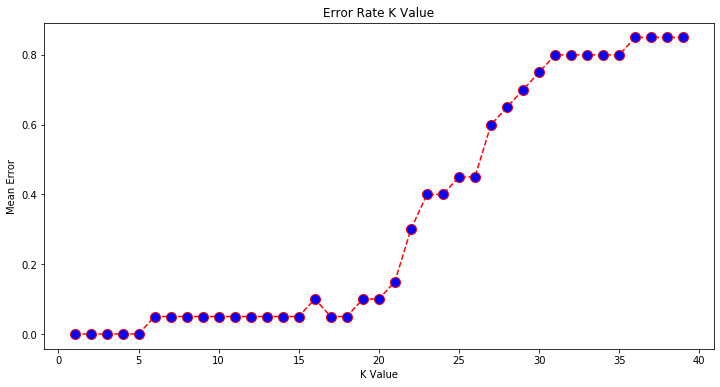

In [84]:
from sklearn.neighbors import KNeighborsClassifier
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))
    
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [83]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[7 0 0 0]
 [0 3 0 0]
 [0 0 4 0]
 [0 0 0 6]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00         6

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



In [46]:
from numpy import array
from sklearn.decomposition import TruncatedSVD

# svd
svd = TruncatedSVD(n_components=2)
svd.fit(X)
result = svd.transform(X)
print(result)

[[-0.78868254  5.07877913]
 [-1.38558858  5.58307857]
 [ 5.06603532 -3.12794593]
 [ 0.96342571  4.85391558]
 [ 4.09126925 -3.17963723]
 [ 4.83675142  0.01389422]
 [-0.18556054  6.74931442]
 [ 6.29562465  1.98167161]
 [-1.055918    5.6944963 ]
 [ 4.84030492 -0.94500947]
 [ 1.6152519  -2.98350426]
 [ 5.11525514 -1.80536025]
 [ 6.74532772  1.84904454]
 [ 2.63344985 -3.34150157]
 [ 6.91105404  2.58235433]
 [-1.2266588   6.30977337]
 [ 1.75705844 -1.97104428]
 [ 5.60529616  3.12974802]
 [-0.168485    5.03341025]
 [ 5.94482219 -0.62285221]
 [ 4.65426772 -2.1973525 ]
 [ 0.3373255   5.56005743]
 [ 4.04348516 -2.60309577]
 [ 3.65216118 -0.31515166]
 [-0.32138151  5.20870845]
 [ 7.55113007  3.07799634]
 [ 5.24383899  1.76948416]
 [-0.18497091  3.31439084]
 [ 6.90593761  2.26847824]
 [ 5.38483028 -1.37408781]
 [ 4.78549372 -0.29356733]
 [ 3.35317866 -2.72835702]
 [-1.70468108  4.37609151]
 [ 4.22446701 -2.42811713]
 [ 4.70159853 -2.98134883]
 [ 4.85699275 -0.49316105]
 [ 8.15121385  1.60683154]
 

In [69]:
df1 = pd.DataFrame(result,columns=['x'+str(i) for i in range(1,3)])

X1 = df1.iloc[:, :-1].values
y1 = df.iloc[:, -1].values

from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.33)

# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# scaler.fit(X_train1)

# X_train1 = scaler.transform(X_train1)
# X_test1 = scaler.transform(X_test1)

Text(0, 0.5, 'Mean Error')

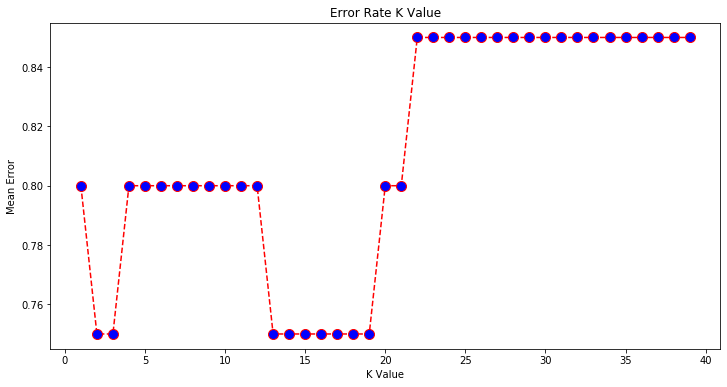

In [86]:
from sklearn.neighbors import KNeighborsClassifier
error1 = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train1, y_train1)
    pred_i = knn.predict(X_test1)
    error1.append(np.mean(pred_i != y_test))
    
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error1, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [74]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test1, y_pred1))
print(classification_report(y_test1, y_pred1))

[[6 0 0 0]
 [0 2 2 0]
 [1 1 2 0]
 [0 0 0 6]]
              precision    recall  f1-score   support

           0       0.86      1.00      0.92         6
           1       0.67      0.50      0.57         4
           2       0.50      0.50      0.50         4
           3       1.00      1.00      1.00         6

    accuracy                           0.80        20
   macro avg       0.76      0.75      0.75        20
weighted avg       0.79      0.80      0.79        20



[[1.    0.052 0.001 ... 0.003 0.001 0.001]
 [0.055 1.    0.    ... 0.    0.014 0.   ]
 [0.    0.    1.    ... 0.215 0.011 0.047]
 ...
 [0.005 0.    0.215 ... 1.    0.005 0.032]
 [0.    0.006 0.018 ... 0.002 1.    0.   ]
 [0.002 0.    0.038 ... 0.024 0.    1.   ]]


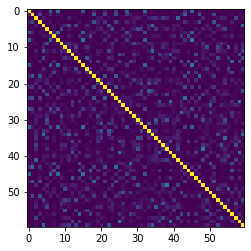

In [75]:
clf = UnsupervisedRandomForest(feature_combinations='auto', max_depth=None,
                         max_features='auto', min_samples_split='auto',
                         n_estimators=1000, n_jobs=None,
                         projection_matrix='RerF', random_state=0)
clf.fit(X)
sim_mat = clf.transform()
print(sim_mat)
plt.imshow(sim_mat)
sim_mat.shape

from numpy import array
from sklearn.decomposition import TruncatedSVD

# svd
svd1 = TruncatedSVD(n_components=2)
svd1.fit(sim_mat)
result1 = svd1.transform(sim_mat)

In [90]:
df2 = pd.DataFrame(result1,columns=['x'+str(i) for i in range(1,3)])

X2 = df2.iloc[:, :-1].values
y2 = df.iloc[:, -1].values

from sklearn.model_selection import train_test_split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.33)

Text(0, 0.5, 'Mean Error')

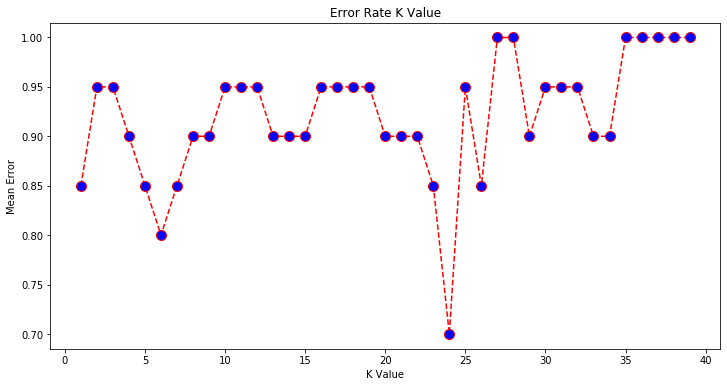

In [92]:
from sklearn.neighbors import KNeighborsClassifier
error2 = []

for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train2, y_train2)
    pred_i = knn.predict(X_test2)
    error2.append(np.mean(pred_i != y_test))
    
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error2, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [94]:
classifier = KNeighborsClassifier(n_neighbors=24)
classifier.fit(X_train2, y_train2)


y_pred2 = classifier.predict(X_test2)

from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test2, y_pred2))
print(classification_report(y_test2, y_pred2))

[[3 0 1 0]
 [0 4 2 0]
 [0 2 1 1]
 [0 3 2 1]]
              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.44      0.67      0.53         6
           2       0.17      0.25      0.20         4
           3       0.50      0.17      0.25         6

    accuracy                           0.45        20
   macro avg       0.53      0.46      0.46        20
weighted avg       0.52      0.45      0.45        20



In [35]:
#Difining every function and calculaing based on every function. 

#Distance Function
import math
def euclideanDistance(instance1, instance2, length):
	distance = 0
	for x in range(length):
		distance += pow((instance1[x] - instance2[x]), 2)
	return math.sqrt(distance)

In [36]:
#Finding Neighours function
import operator 
def getNeighbors(trainingSet, testInstance, k):
	distances = []
	length = len(testInstance)-1
	for x in range(len(trainingSet)):
		dist = euclideanDistance(testInstance, trainingSet[x], length)
		distances.append((trainingSet[x], dist))
	distances.sort(key=operator.itemgetter(1))
	neighbors = []
	for x in range(k):
		neighbors.append(distances[x][0])
	return neighbors

In [37]:
import operator
def getResponse(neighbors):
	classVotes = {}
	for x in range(len(neighbors)):
		response = neighbors[x][-1]
		if response in classVotes:
			classVotes[response] += 1
		else:
			classVotes[response] = 1
	sortedVotes = sorted(classVotes.iteritems(), key=operator.itemgetter(1), reverse=True)
	return sortedVotes[0][0]

In [38]:
def getAccuracy(testSet, predictions):
	correct = 0
	for x in range(len(testSet)):
		if testSet[x][-1] is predictions[x]:
			correct += 1
	return (correct/float(len(testSet))) * 100.0

In [81]:
k = 5
N = getNeighbors(X_train, X_test[0], k)
N

[array([ 1.73513304,  0.31582973,  0.3672844 ,  1.42173039, -0.22253639]),
 array([ 1.57363352,  0.87840962,  0.85715478,  1.39371517, -0.95453523]),
 array([1.77416694, 0.17335259, 0.41918113, 1.52821982, 0.78822133]),
 array([ 1.71536922, -0.01870371,  0.05393411,  1.44882275, -0.82868182]),
 array([1.7043389 , 0.62315293, 0.48768112, 2.24769415, 1.08116335])]